<a href="https://colab.research.google.com/github/RealB1ackY/ISnT_Lab5-6/blob/main/PR3_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install apriori_python efficient-apriori fpgrowth_py pyarmviz numpy pandas matplotlib seaborn  scikit-learn matplotlib umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 658 kB 9.5 MB/s 
     |████████████████████████████████| 88 kB 8.0 MB/s 
     |████████████████████████████████| 1.1 MB 42.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=03238828acbcd4d1360f849476621d86b821fe1c5c7ffe19bf31b44b32e6f2b0
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=de48f01b04a602a6ca3132aec29c7fd6116d9e58a8c35ac6c5a2772e89b99118
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')

# df = pd.read_csv("dataset/glass.csv")
#просмотр измерений набора данных
df.shape
#предварительный просмотр набора данных
df.head()


,Exam 1 marks,Exam 2 marks,Admission status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
#просмотр названия столбцов набора данных
col_names = df.columns

col_names

Index(['Exam 1 marks', 'Exam 2 marks', 'Admission status'], dtype='object')

In [ ]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

In [ ]:
df.columns

Index(['Exam 1 marks', 'Exam 2 marks', 'Admission status'], dtype='object')

In [ ]:
#проверяем распределение столбца class
df['Admission status'].value_counts()

1    60
0    40
Name: Admission status, dtype: int64

In [ ]:
df.isnull().sum()

Exam 1 marks        0
Exam 2 marks        0
Admission status    0
dtype: int64

In [ ]:
#просмотр сводной статистики в числовых переменных
round(df.describe(),2)

,Exam 1 marks,Exam 2 marks,Admission status
count,100.00,100.00,100.00
mean,65.64,66.22,0.60
std,19.46,18.58,0.49
min,30.06,30.60,0.00
25%,50.92,48.18,0.00
50%,67.03,67.68,1.00
75%,80.21,79.36,1.00
max,99.83,98.87,1.00


Text(0, 0.5, 'Admission status')

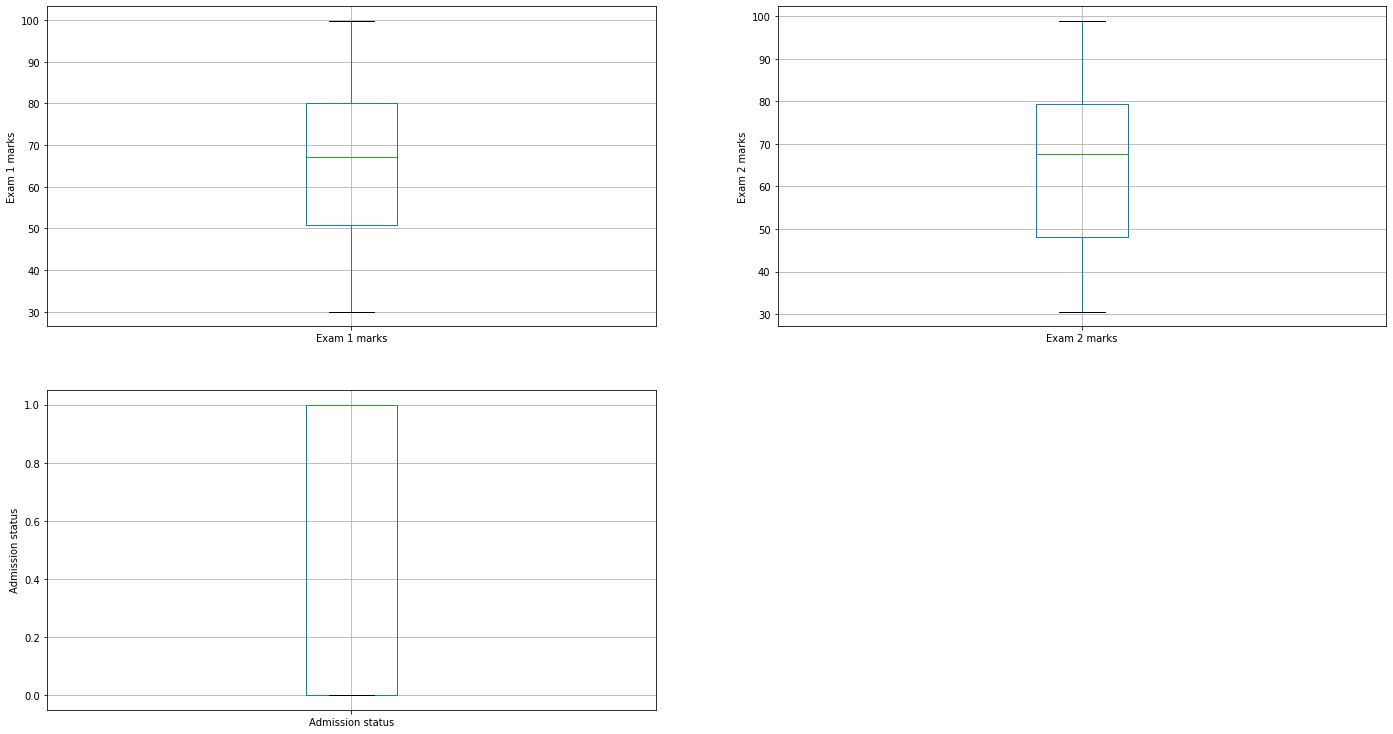

In [ ]:
#нарисуум прямоугольные диаграммы для визуализации выбросов
plt.figure(figsize=(24,20))


plt.subplot(3, 2, 1)
fig = df.boxplot(column='Exam 1 marks')
fig.set_title('')
fig.set_ylabel('Exam 1 marks')


plt.subplot(3, 2, 2)
fig = df.boxplot(column='Exam 2 marks')
fig.set_title('')
fig.set_ylabel('Exam 2 marks')


plt.subplot(3, 2, 3)
fig = df.boxplot(column='Admission status')
fig.set_title('')
fig.set_ylabel('Admission status')


# plt.subplot(6, 2, 4)
# fig = df.boxplot(column='Mg')
# fig.set_title('')
# fig.set_ylabel('Mg')


# plt.subplot(6, 2, 5)
# fig = df.boxplot(column='Al')
# fig.set_title('')
# fig.set_ylabel('Al')


# plt.subplot(6, 2, 6)
# fig = df.boxplot(column='Si')
# fig.set_title('')
# fig.set_ylabel('Si')


# plt.subplot(6, 2, 7)
# fig = df.boxplot(column='K')
# fig.set_title('')
# fig.set_ylabel('K')


# plt.subplot(6, 2, 8)
# fig = df.boxplot(column='Ca')
# fig.set_title('')
# fig.set_ylabel('Ca')

# plt.subplot(6, 2, 9)
# fig = df.boxplot(column='Ba')
# fig.set_title('')
# fig.set_ylabel('Ba')

# plt.subplot(6, 2, 10)
# fig = df.boxplot(column='Fe')
# fig.set_title('')
# fig.set_ylabel('Fe')

# plt.subplot(6, 2, 11)
# fig = df.boxplot(column='classes')
# fig.set_title('')
# fig.set_ylabel('classes')

Text(0, 0.5, 'Values')

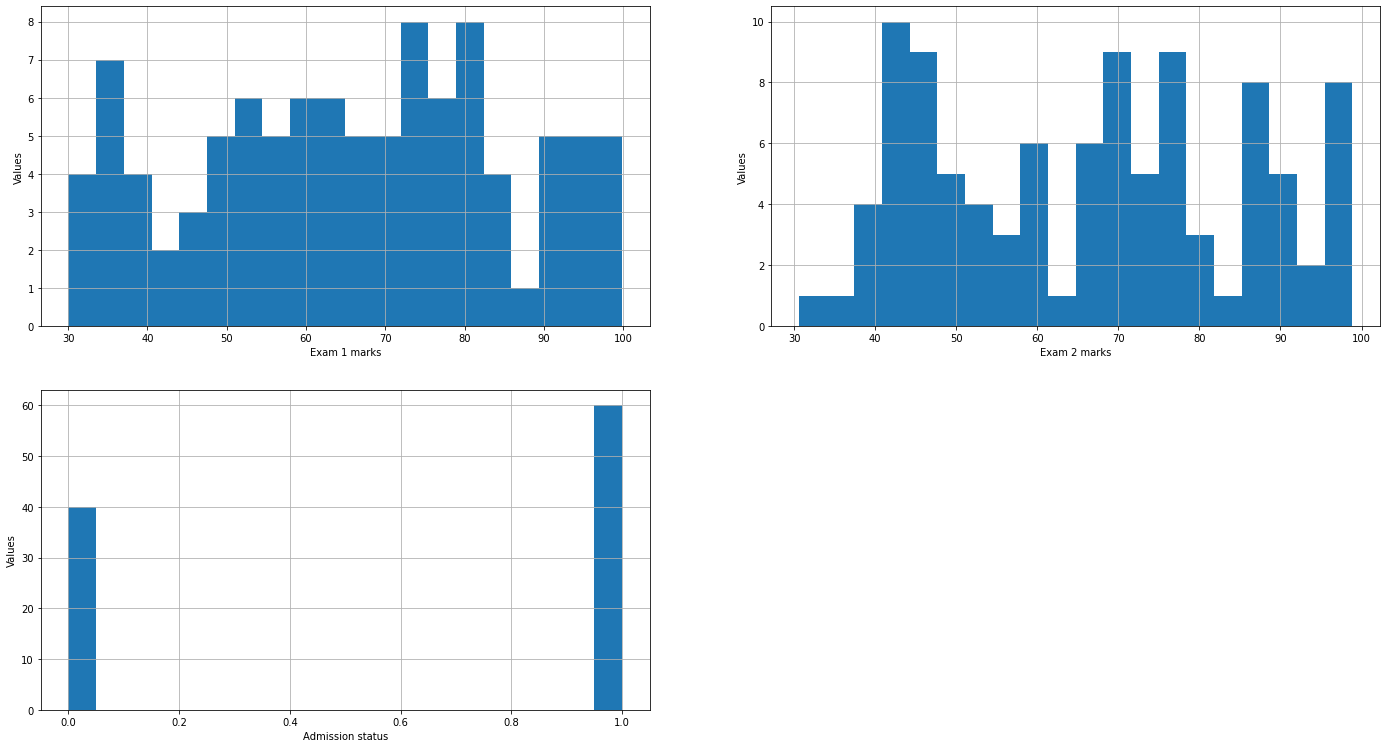

In [ ]:
plt.figure(figsize=(24,20))


plt.subplot(3, 2, 1)
fig = df['Exam 1 marks'].hist(bins=20)
fig.set_xlabel('Exam 1 marks')
fig.set_ylabel('Values')


plt.subplot(3, 2, 2)
fig = df['Exam 2 marks'].hist(bins=20)
fig.set_xlabel('Exam 2 marks')
fig.set_ylabel('Values')


plt.subplot(3, 2, 3)
fig = df['Admission status'].hist(bins=20)
fig.set_xlabel('Admission status')
fig.set_ylabel('Values')


# plt.subplot(6, 2, 4)
# fig = df['Mg'].hist(bins=20)
# fig.set_xlabel('Mg')
# fig.set_ylabel('Values')


# plt.subplot(6, 2, 5)
# fig = df['Al'].hist(bins=20)
# fig.set_xlabel('Al')
# fig.set_ylabel('Values')


# plt.subplot(6, 2, 6)
# fig = df['Si'].hist(bins=20)
# fig.set_xlabel('Si')
# fig.set_ylabel('Values')


# plt.subplot(6, 2, 7)
# fig = df['K'].hist(bins=20)
# fig.set_xlabel('K')
# fig.set_ylabel('Values')


# plt.subplot(6, 2, 8)
# fig = df['Ca'].hist(bins=20)
# fig.set_xlabel('Ca')
# fig.set_ylabel('Values')

# plt.subplot(6, 2, 9)
# fig = df['Ba'].hist(bins=20)
# fig.set_xlabel('Ba')
# fig.set_ylabel('Values')

# plt.subplot(6, 2, 10)
# fig = df['Fe'].hist(bins=20)
# fig.set_xlabel('Fe')
# fig.set_ylabel('Values')

# plt.subplot(6, 2, 11)
# fig = df['classes'].hist(bins=20)
# fig.set_xlabel('classes')
# fig.set_ylabel('Values')

In [ ]:
#Объявляем вектор объектов и целевую переменную
X = df.drop(['Admission status'], axis=1)

y = df['Admission status']

#разделим X и y на обучающие и тестовые наборы
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#проверим форму X_train и X_test
X_train.shape, X_test.shape

((80, 2), (20, 2))

In [ ]:
#Масштабирование объектов
cols = X_train.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,Exam 1 marks,Exam 2 marks
count,8.000000e+01,8.000000e+01
mean,-6.661338e-17,2.553513e-16
std,1.006309e+00,1.006309e+00
min,-1.819123e+00,-1.924090e+00
25%,-7.476022e-01,-1.032450e+00
50%,5.102202e-02,3.988464e-02
75%,7.983973e-01,9.908210e-01
max,1.654467e+00,1.691773e+00


In [ ]:
#Теперь у нас есть набор данных X_train, готовый для загрузки в классификатор логистической регрессии. Я сделаю это следующим образом.
#импорт классификатора SVC
from sklearn.svm import SVC

#импортируем показатели для вычисления точности
from sklearn.metrics import accuracy_score

#создать экземпляр классификатора с гиперпараметрами по умолчанию
svc=SVC() 

#подогнать классификатор к тренировочному набору
svc.fit(X_train,y_train)

#делаем прогнозы на тестовом наборе
y_pred=svc.predict(X_test)

print('Оценка точности модели с использованием гиперпараметров по умолчанию: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с использованием гиперпараметров по умолчанию: 0.8000


In [ ]:
#SVM с ядром RBF и C=100.0
#Итак, мы должны увеличить значение C, поскольку чем выше C, тем меньше выбросов.
svc=SVC(C=100.0) 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Оценка точности модели с использованием ядра RBF и С=100.0 : {0:0.9f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с использованием ядра RBF и С=100.0 : 0.900000000


In [ ]:
#SVM с ядром RBF и C=1000.0
svc=SVC(C=1000.0) 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Оценка точности модели с использованием ядра RBF и С=1000.0 : {0:0.9f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с использованием ядра RBF и С=1000.0 : 0.950000000


In [ ]:
#SVM с ядром RBF и C=10000.0
svc=SVC(C=10000.0) 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Оценка точности модели с использованием ядра RBF и С=10000.0 : {0:0.9f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с использованием ядра RBF и С=10000.0 : 0.950000000


In [ ]:
#Вывод результатов по тренировочному и тестовому наборам
print('Тренировочный: {:.4f}'.format(svc.score(X_train, y_train)))

print('Тестовый: {:.4f}'.format(svc.score(X_test, y_test)))

Тренировочный: 1.0000
Тестовый: 0.9500


In [ ]:
#SVM с ядром linear и C=100.0
linear_svc=SVC(kernel='linear', C=100.0) 

linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('Оценка точности модели с использованием ядра Linear и С=100.0 : {0:0.6f}'. format(accuracy_score(y_test, y_pred_test)))

Оценка точности модели с использованием ядра Linear и С=100.0 : 0.850000


In [ ]:
#SVM с ядром linear и C=100.0
linear_svc=SVC(kernel='linear', C=1000.0) 

linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('Оценка точности модели с использованием ядра Linear и С=1000.0 : {0:0.6f}'. format(accuracy_score(y_test, y_pred_test)))

Оценка точности модели с использованием ядра Linear и С=1000.0 : 0.800000


In [ ]:
#SVM с ядром linear и C=10.0
linear_svc=SVC(kernel='linear', C=10.0) 

linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('Оценка точности модели с использованием ядра Linear и С=10.0 : {0:0.6f}'. format(accuracy_score(y_test, y_pred_test)))

Оценка точности модели с использованием ядра Linear и С=10.0 : 0.850000


In [ ]:
#Здесь y_test - это истинные метки классов, а y_pred - это предсказанные метки классов в тестовом наборе.
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
#Вывод результатов по тренировочному и тестовому наборам
print('Тренировочный: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Тестовый: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Тренировочный: 0.9125
Тестовый: 0.8500


In [ ]:
#SVM с ядром Polynomial  и C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 

poly_svc.fit(X_train, y_train)

y_pred=poly_svc.predict(X_test)

print('Оценка точности модели с использованием ядра Polynomial и С=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с использованием ядра Polynomial и С=1.0 : 0.8500


In [ ]:
#SVM с ядром Polynomial  и C=100.0
poly_svc=SVC(kernel='poly', C=100.0) 

poly_svc.fit(X_train, y_train)

y_pred=poly_svc.predict(X_test)

print('Оценка точности модели с использованием ядра Polynomial и С=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с использованием ядра Polynomial и С=100.0 : 0.9000


In [ ]:
#Вывод результатов по тренировочному и тестовому наборам
print('Тренировочный: {:.4f}'.format(poly_svc.score(X_train, y_train)))

print('Тестовый: {:.4f}'.format(poly_svc.score(X_test, y_test)))

Тренировочный: 0.9250
Тестовый: 0.9000


In [ ]:
#SVM с ядром Sigmoid  и C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 

sigmoid_svc.fit(X_train,y_train)

y_pred=sigmoid_svc.predict(X_test)

print('Оценка точности модели с использованием ядра Sigmoid и С=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с использованием ядра Sigmoid и С=1.0 : 0.8500


In [ ]:
#SVM с ядром Sigmoid  и C=100.0
sigmoid_svc=SVC(kernel='sigmoid', C=100.0) 

sigmoid_svc.fit(X_train,y_train)

y_pred=sigmoid_svc.predict(X_test)

print('Оценка точности модели с использованием ядра Sigmoid и С=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с использованием ядра Sigmoid и С=100.0 : 0.8500


In [ ]:
print('Оценка точности тренировочного набора: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Оценка точности тренировочного набора: 0.9125


In [ ]:
#Мы можем видеть, что сигмовидное ядро также работает плохо, как и в случае с полиномиальным ядром.
#Вывод результатов по тренировочному и тестовому наборам
print('Тренировочный: {:.4f}'.format(sigmoid_svc.score(X_train, y_train)))

print('Тестовый: {:.4f}'.format(sigmoid_svc.score(X_test, y_test)))

Тренировочный: 0.8250
Тестовый: 0.8500


In [ ]:
#Отчет о классификации¶
#Отчет о классификации - это еще один способ оценить эффективность модели классификации. 
#В нем отображаются показатели точности, Recall, f1 и поддержки для модели.
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.75      0.86        12

    accuracy                           0.85        20
   macro avg       0.86      0.88      0.85        20
weighted avg       0.89      0.85      0.85        20



In [ ]:
#Точность классификации
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('\nТочность классификации : {0:0.4f}'.format(classification_accuracy))

#Ошибка классификации
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Ошибка классификации : {0:0.4f}'.format(classification_error))

#вывод оценки точности
precision = TP / float(TP + FP)

print('\nPrecision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall : {0:0.4f}'.format(recall))

F1 = 2 * (precision * recall) / (precision + recall)

print('F1: {0:0.4f}'.format(F1))

Confusion matrix

 [[8 0]
 [3 9]]

True Positives(TP) =  8

True Negatives(TN) =  9

False Positives(FP) =  0

False Negatives(FN) =  3

Точность классификации : 0.8500
Ошибка классификации : 0.1500

Precision : 1.0000
Recall : 0.7273
F1: 0.8421


In [ ]:
#Оптимизация гиперпараметров с использованием GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

# создаем экземпляр классификатора с гиперпараметрами по умолчанию с kernel=rbf, C=1.0 и gamma=auto
svc=SVC() 



# объявляем параметры для настройки гиперпараметра
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
#изучем лучшую модель
#лучший результат, достигнутый во время GridSearchCV
print('GridSearch CV дает лучший результат : {:.4f}\n\n'.format(grid_search.best_score_))


# параметры, которые дают наилучшие результаты
print('Параметры, которые дают наилучшие результаты :','\n\n', (grid_search.best_params_))


# распечатайте оценщик, выбранный при поиске по сетке
print('\n\nОценщик, выбранный при поиске по сетке :','\n\n', (grid_search.best_estimator_))

GridSearch CV дает лучший результат : 0.9875


Параметры, которые дают наилучшие результаты : 

 {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}


Оценщик, выбранный при поиске по сетке : 

 SVC(C=10, gamma=0.5)


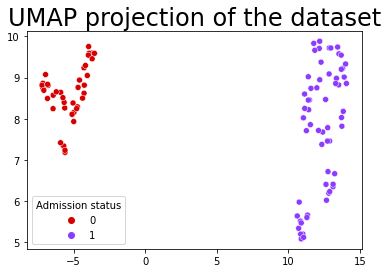

In [ ]:
import umap
import colorcet as cc
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC 

# model = SVC (kernel = 'linear') # Это линейная машина опорных векторов
# model.fit(X,y)

# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
#   max_iter=-1, probability=False, random_state=None, shrinking=True,
#   tol=0.001, verbose=False)

# # 2) Модуль рисования
# def plot_svc_decision_function(model, ax=None, plot_support=True):
#     if ax is None:
#         ax = plt.gca()
#     xlim = ax.get_xlim()
#     ylim = ax.get_ylim()
    
#     #create grid to evaluate model
#     x = np.linspace(xlim[0], ylim[1], 30)
#     y = np.linspace(ylim[0], ylim[1], 30)
#     Y, X = np.meshgrid(y, x)
#     xy = np.vstack([X.ravel(), Y.ravel()]).T
#     P = model.decision_function(xy).reshape(X.shape)
    
#     # plot decision boundary and margins
#     ax.contour(X, Y, P, colors='k',
#                levels=[-1, 0, 1], alpha=0.5,
#                linestyles=['--', '-', '--'])
    
#     # plot support vectors
#     if plot_support:
#         ax.scatter(model.support_vectors_[:, 0],
#                    model.support_vectors_[:, 1],
#                    s=300, linewidth=1, facecolors='none');
#     ax.set_xlim(xlim)
#     ax.set_ylim(ylim)
    

# plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


data = pd.read_csv("https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv")
data = data.dropna()
reducer = umap.UMAP()

scaled_data = StandardScaler().fit_transform(data)
embedding = reducer.fit_transform(scaled_data)
embedding.shape

palette = sns.color_palette(cc.glasbey, n_colors=2)

sns.scatterplot(embedding[:, 0],
                embedding[:, 1], 
                data=data, 
                hue = 'Admission status', 
                palette=palette)

plt.title('UMAP projection of the dataset', fontsize=24);
# plot_svc_decision_function(model);

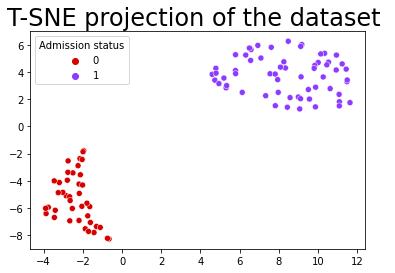

In [ ]:
from matplotlib import pyplot as plt
import colorcet as cc
import umap
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import *

data = pd.read_csv("https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv")

tsne = StandardScaler().fit_transform(data)

tsne_data = TSNE(n_components=2, perplexity=30,
    early_exaggeration=12,
    learning_rate=200, 
    n_iter=5000, 
    n_iter_without_progress=300, 
    min_grad_norm=0.0000001, 
    metric='euclidean', 
    init='random', 
    verbose=0, 
    random_state=42,
    method='barnes_hut', 
    angle=0.5, 
    n_jobs=-1,).fit_transform(tsne)

palette = sns.color_palette(cc.glasbey, n_colors=2)
sns.scatterplot(tsne_data[:, 0],
                tsne_data[:, 1], 
                data=data, 
                hue = 'Admission status', 
                palette=palette)

plt.title('T-SNE projection of the dataset ', fontsize=24);